In [36]:
%matplotlib inline
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np

In [3]:
df = pd.read_excel('LU_DLR_LO_NR_Zones 1-3 - approximate walk times.xlsx', sheet_name=0)


In [4]:
df.columns

Index(['Line', 'From', 'To', 'Time to use on map'], dtype='object')

In [5]:
lines = {}

for i in df.index:
    lines[df['Line'][i]] = [df['From'][i], df['To'][i], df['Time to use on map'][i]]

In [6]:
stations = sorted(list(set([df['From'][i] for i in df.index] + [df['To'][i] for i in df.index])))


In [70]:
list(enumerate(stations))[:10]


[(0, 'Abbey Road'),
 (1, 'Acton Central'),
 (2, 'Acton Main Line'),
 (3, 'Acton Town'),
 (4, 'Aldgate'),
 (5, 'Aldgate East'),
 (6, 'Alexandra Palace'),
 (7, 'All Saints'),
 (8, 'Angel'),
 (9, 'Archway')]

In [9]:
ids = {}
for (num, name) in enumerate(stations):
    ids[name] = num

In [71]:
num_station = len(ids)
a = []
for i in range(num_station):
    a.append([99999]*num_station)

for i in df.index:
    s1 = ids[df['From'][i]]
    s2 = ids[df['To'][i]]
    a[s1][s2] = df['Time to use on map'][i]
    a[s2][s1] = df['Time to use on map'][i]


In [72]:
start_station = "Holland Park"#"King's Cross St.Pancras"
n=num_station
startnode = ids[start_station]
nextnode = -1
d = [a[startnode][i] for i in range(n)]
pred = [startnode]*n
visited = [False] * n

d[startnode] = 0
visited[startnode] = True
count = 1;

while (count<n-1):
    mindistance = 999999
    for i in range(n):
        if d[i]<mindistance and not visited[i]:
            mindistance = d[i]
            nextnode = i
    visited[nextnode] = True
    for i in range(n):
        if not visited[i] and (mindistance + a[nextnode][i]<d[i]):
            d[i] = mindistance + a[nextnode][i]
            pred[i]=nextnode
    count +=1


In [60]:
startnode

155

In [61]:
ids["Pimlico"]

247

In [62]:
d[247]

95

In [63]:
this_node = 247
print("{}".format(stations[this_node]), end="")
while this_node != startnode:
    this_node = pred[this_node]
    print("<-{}".format(stations[this_node]), end="")

Pimlico<-Victoria<-Green Park<-Bond Street<-Marble Arch<-Lancaster Gate<-Queensway<-Notting Hill Gate<-Holland Park

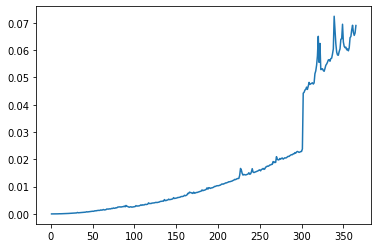

In [17]:
import time

times = []

for i in range(num_station-1):
    
    n=i+1
    startnode = 0
    nextnode = -1
    d = [a[startnode][i] for i in range(n)]
    pred = [startnode]*n
    visited = [False] * n

    d[startnode] = 0
    visited[startnode] = True
    count = 1;

    start_time = time.time()
    
    while (count<n-1):
        mindistance = 999999
        for i in range(n):
            if d[i]<mindistance and not visited[i]:
                mindistance = d[i]
                nextnode = i
        visited[nextnode] = True
        for i in range(n):
            if not visited[i] and (mindistance + a[nextnode][i]<d[i]):
                d[i] = mindistance + a[nextnode][i]
                pred[i]=nextnode
        count +=1
    
    interval = time.time()-start_time

    times.append(interval)

import matplotlib.pyplot as pl

x=[i+1 for i in range(n)]

pl.plot(x, times)

In [39]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [99]:
len(times)

365

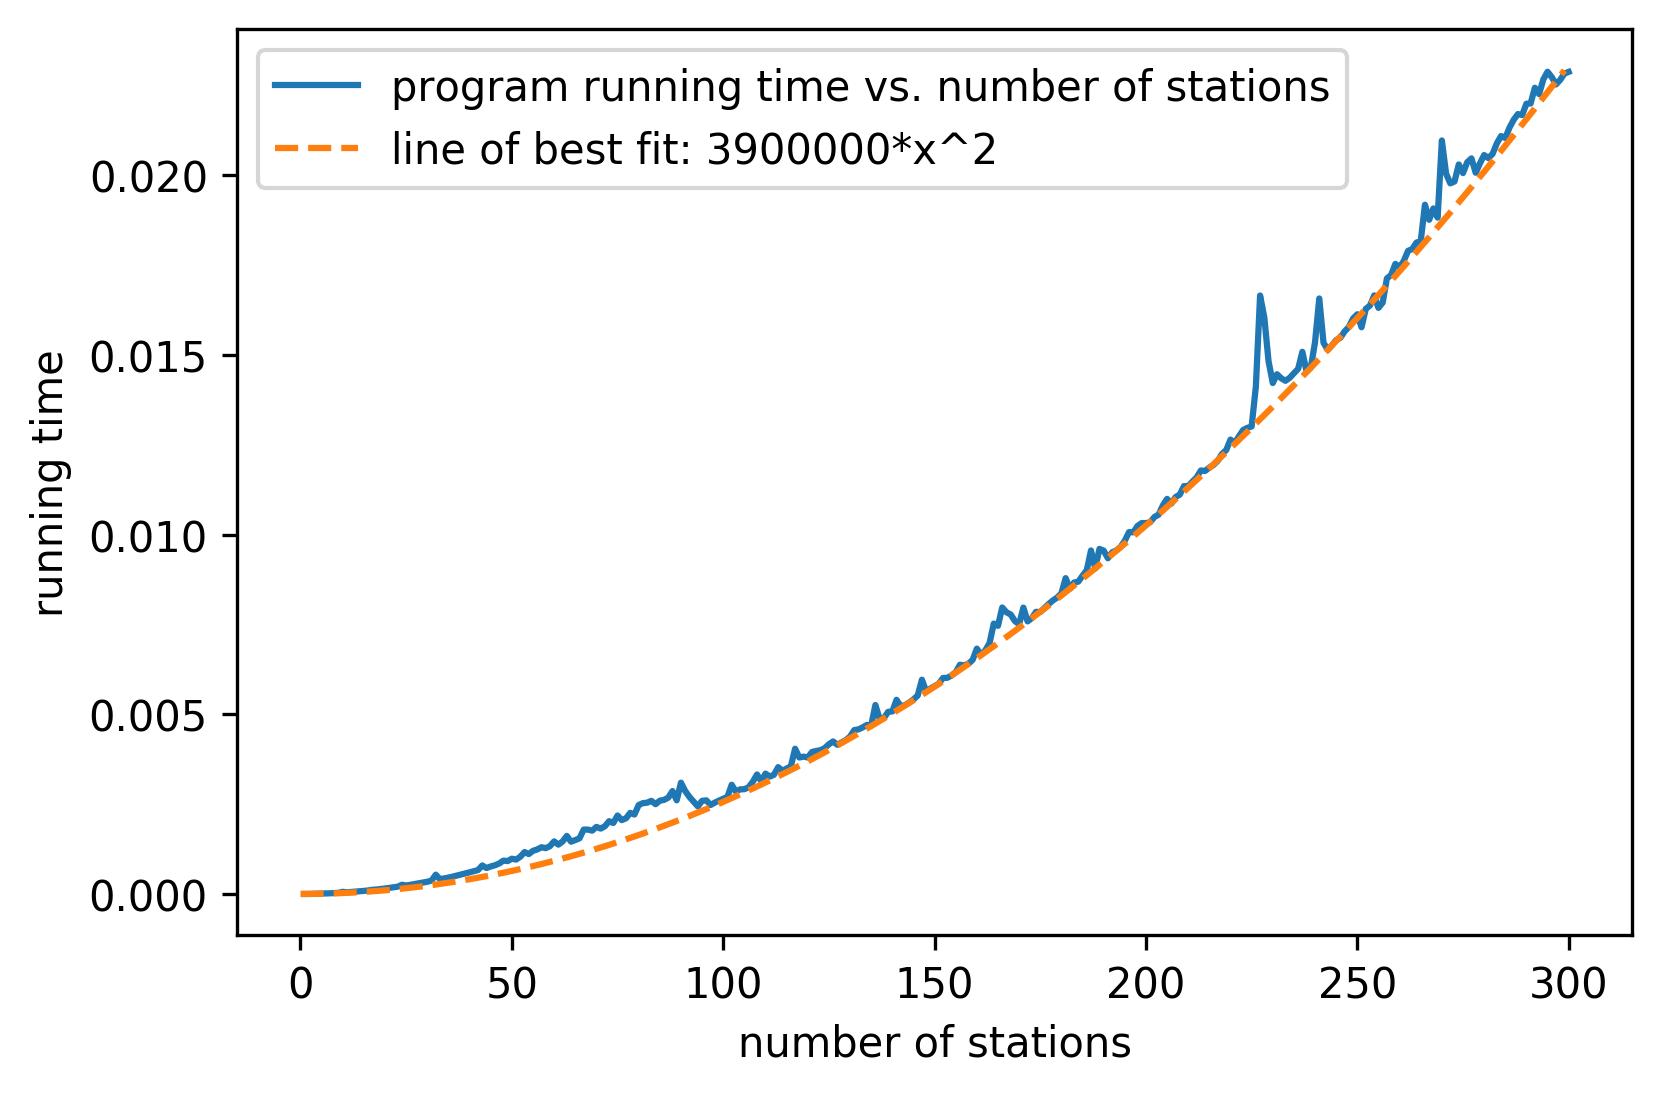

In [43]:
pl.plot(x[:300], times[:300], label='program running time vs. number of stations')
x1=np.arange(0, 300, 1)
pl.plot(x1, x1**2/3900000,'--', label='line of best fit: 3900000*x^2')
pl.xlabel('number of stations')
pl.ylabel('running time')
pl.legend()
pl.show()